In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd

df = pd.read_csv("../data/Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [10]:
def handleRate(value):
    value = str(value).split('/')
    return float(value[0])

df['rate'] = df['rate'].apply(handleRate)


In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

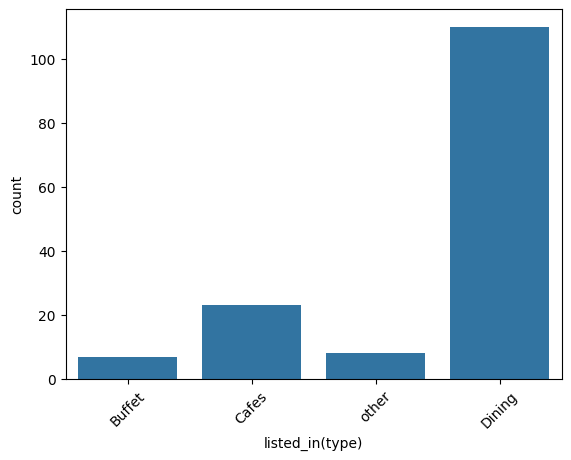

In [12]:
sns.countplot(x=df['listed_in(type)'])
plt.xticks(rotation=45)
plt.show()

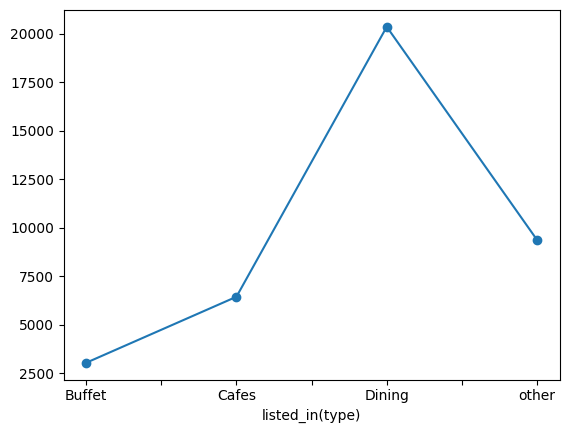

In [13]:
grouped = df.groupby('listed_in(type)')['votes'].sum()
grouped.plot(kind='line', marker='o')
plt.show()

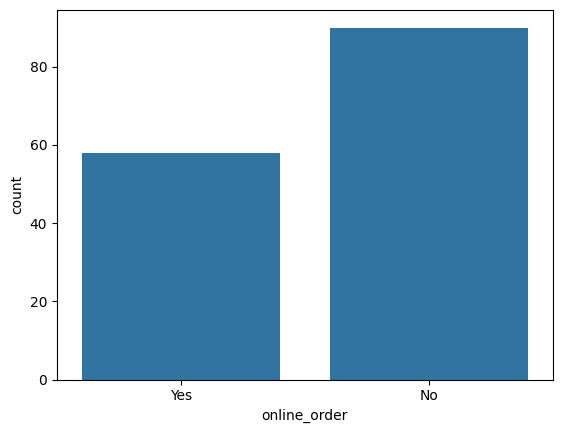

In [14]:
sns.countplot(x=df['online_order'])
plt.show()

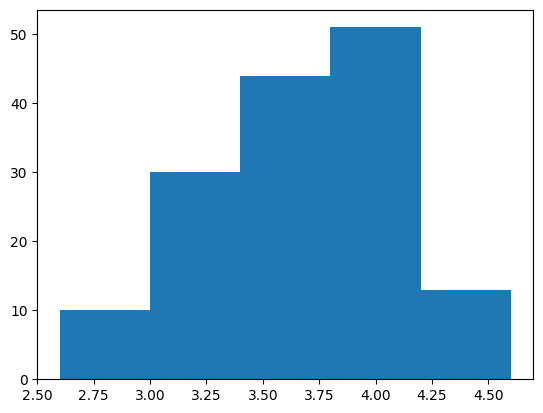

In [15]:
plt.hist(df['rate'], bins=5)
plt.show()

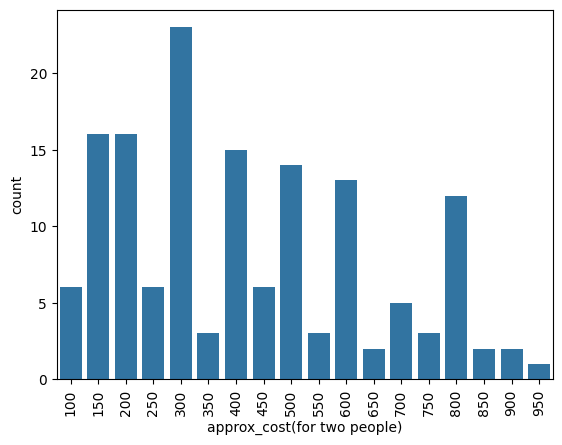

In [16]:
sns.countplot(x=df['approx_cost(for two people)'])
plt.xticks(rotation=90)
plt.show()

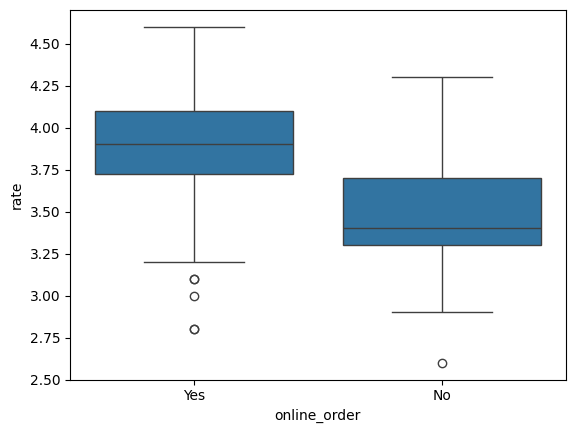

In [17]:
sns.boxplot(x='online_order', y='rate', data=df)
plt.show()


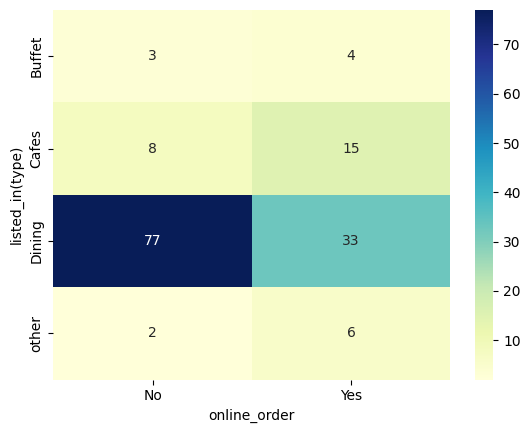

In [18]:
pivot = df.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
